# Gain Company Insights

- Provide recommendations and key Insights for key business decisions such that it may reduce costs and increase revenue.
- Give key insights on customer's feelings, needs, and feedbacks.
- This first task is focused on 
    - Scraping and collecting customer feedback from a third-party source.
    - Reviewing data and prsent insights.


# Web Scrapping

In [296]:
from bs4 import BeautifulSoup
import requests as req
import pandas as pd
import re
import numpy as np
import seaborn as sns

pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = 100
pd.options.display.max_columns= 122


import warnings
warnings.filterwarnings("ignore")

###  Things to scrap

- overall_rating_out_of_10 
- review_tag_line ok
- User name ok
- User_country ok
- Date_of_rating ok
- Traveller_type
- Seat_type
- route
- Date_flown
- Seat_comfort
- cabin_staff_service
- food
- inflight_entertainment
- ground_service
- value_for_money
- Recommended

In [38]:
page_size = 100
pages = 36

pg = 1

with open("ba_reviews.txt", "w", encoding = "utf-8") as f:
    
    header = 'user_name' + ">>" + 'country_name'   + ">>" + 'review_date' + ">>" + 'overall_rating' + ">>" + 'trip_verified'  + ">>" +\
                     'Aircraft'  + ">>" + 'Type_Of_Traveller' + ">>" + 'Seat_Type'   + ">>" + 'Route' + ">>" + 'Date_Flown'   + ">>" +\
                     'Inflight_Entertainment_out_of_5' + ">>" + 'Food_Beverages_out_of_5' + ">>" + 'Value_For_Money_out_of_5' + ">>" +\
                     'Wifi_Connectivity_out_of_5'      + ">>" + 'Seat_Comfort_out_of_5'   + ">>" + 'Date_Flown_out_of_5'      + ">>" +\
                     'Cabin_Staff_Service_out_of_5'    + ">>" + 'Ground_Service_out_of_5' + ">>" + 'reconmmended'             + ">>" +\
                     'tagline'+ ">>" + 'review_text'

    f.write(header)
    f.write("\n")
    for page_num in range(1,pages+1):

        url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{page_num}/?sortby=post_date%3ADesc&pagesize={page_size}"
        response = req.get(url)
        html = response.text
        soup = BeautifulSoup(html, "html.parser")
        user_reviews = soup.findAll( "article", {"itemprop":"review"}  )

        rev = 1
        for user in user_reviews:
            print(pg,rev)

            user_rating_div = user.find("div", {"class":"rating-10"})
            if user_rating_div.find("span")!=None:
                overall_rating  = user_rating_div.find("span", {"itemprop":"ratingValue"}).text
            else:
                overall_rating = "No Information"

            user_body_div   = user.find("div", {"class":"body"})

            tagline         = user_body_div.h2.text.strip('""').strip("\n")
            user_name       = user_body_div.h3.find("span", {"itemprop":"name"}).text.strip()

            review_date     = user_body_div.h3.time.text.strip() 

            user_details    = user_body_div.h3.text
            match           = re.search(r'\((.*?)\)', user_details)
            
            if match !=None:
                country_name    = match.group(1)
            else:
                country_name= "No Information"

            review_body     = user.find("div", {"class":"text_content", "itemprop":"reviewBody"}).text.split("|")

            if len(review_body)==2:
                trip_verified   = review_body[0].strip().strip("\n")
                review_text     = review_body[1].strip().strip("\n")
            else:
                trip_verified   = "No Information"
                review_text     = review_body[0].strip().strip("\n")


            table = user.find("table", {"class":"review-ratings"})
            trs    = table.findAll("tr")

            td_info = [i.findAll("td") for i in trs if not i.find("td", {"class":"rating-no"}) if not i.find("td", {"class":"rating-yes"}) if not i.find("td", {"class":"review-rating-stars"}) ]

            td_info_dict = dict()
            for tr in td_info:
                td_info_name  = tr[0].text.strip()
                td_info_value = tr[1].text.strip()
                td_info_dict[td_info_name] = td_info_value


            info_names = ["Aircraft", "Type Of Traveller", "Seat Type", "Route", "Date Flown"]

            for i in info_names:
                var_value = "No information"  
                found_match = False 

                for j in td_info_dict.keys():
                    if i == j:
                        var_value = td_info_dict[j]
                        found_match = True
                        break  # Exit the loop once a match is found

                # Set the variable using the default value or the value from the dictionary
                my_string = '_'.join(i.split())
                var_name = f"{my_string}"
                globals()[var_name] = var_value 

                # Reset the flag variable for the next iteration
                found_match = False



            td_dict = dict()
            for tr in trs[len(td_info):-1]:
                td = tr.findAll("td")
                td_name = td[0].text.strip()
                td_score = len(td[1].findAll("span", {"class":"star fill"}))
                td_dict[td_name] = td_score

            names = ['Inflight Entertainment', 'Food & Beverages', 'Value For Money', 'Wifi & Connectivity', 'Seat Comfort',\
                         'Date Flown', 'Cabin Staff Service', 'Ground Service']

            for i in names:
                var_value = "No information"  
                found_match = False 

                for j in td_dict.keys():
                    if i == j:
                        var_value = str(td_dict[j])
                        found_match = True
                        break  # Exit the loop once a match is found

                # Set the variable using the default value or the value from the dictionary
                my_string = '_'.join(i.replace("&", "").split())
                var_name = f"{my_string}_out_of_5"
                globals()[var_name] = var_value 

                # Reset the flag variable for the next iteration
                found_match = False


            reconmmended = [i.findAll("td", {"class":"review-value"}) for i in trs][-1][0].text

            final_details = user_name + ">>" + country_name + ">>" + review_date + ">>" + overall_rating + ">>" + \
                                trip_verified + ">>"  + Aircraft + ">>" + Type_Of_Traveller + ">>" + Seat_Type + ">>" + Route + ">>" +\
                                Date_Flown + ">>" + Inflight_Entertainment_out_of_5 + ">>" + Food_Beverages_out_of_5 + ">>" + \
                                Value_For_Money_out_of_5 + ">>" +  Wifi_Connectivity_out_of_5 + ">>" +  Seat_Comfort_out_of_5 + ">>" +\
                                Date_Flown_out_of_5 + ">>" +  Cabin_Staff_Service_out_of_5 + ">>" + Ground_Service_out_of_5 + ">>" + \
                                reconmmended + ">>" + tagline  + ">>" + review_text 


            f.write(final_details)
            f.write("\n")

            rev = rev+1

        pg = pg+1





1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
1 100
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
2 56
2 57
2 58
2 59
2 60
2 61
2 62
2 63
2 64
2 65
2 66
2 67
2 68
2 69
2 70
2 71
2 72
2 73
2 74
2 75
2 76
2 77
2 78
2 79
2 80
2 81
2 82
2 83
2 84
2 85
2 86
2 87
2 88
2 89
2 90
2 91
2 92
2 93
2 94
2 95
2 96
2 97
2 98
2 99
2 100
3 1
3 2
3 3
3 4


16 74
16 75
16 76
16 77
16 78
16 79
16 80
16 81
16 82
16 83
16 84
16 85
16 86
16 87
16 88
16 89
16 90
16 91
16 92
16 93
16 94
16 95
16 96
16 97
16 98
16 99
16 100
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
17 11
17 12
17 13
17 14
17 15
17 16
17 17
17 18
17 19
17 20
17 21
17 22
17 23
17 24
17 25
17 26
17 27
17 28
17 29
17 30
17 31
17 32
17 33
17 34
17 35
17 36
17 37
17 38
17 39
17 40
17 41
17 42
17 43
17 44
17 45
17 46
17 47
17 48
17 49
17 50
17 51
17 52
17 53
17 54
17 55
17 56
17 57
17 58
17 59
17 60
17 61
17 62
17 63
17 64
17 65
17 66
17 67
17 68
17 69
17 70
17 71
17 72
17 73
17 74
17 75
17 76
17 77
17 78
17 79
17 80
17 81
17 82
17 83
17 84
17 85
17 86
17 87
17 88
17 89
17 90
17 91
17 92
17 93
17 94
17 95
17 96
17 97
17 98
17 99
17 100
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
18 15
18 16
18 17
18 18
18 19
18 20
18 21
18 22
18 23
18 24
18 25
18 26
18 27
18 28
18 29
18 30
18 31
18 32
18 33
18 34
18 35
18 36
18 37
18 38
18 39
18 40
18 41
18 42
18

30 68
30 69
30 70
30 71
30 72
30 73
30 74
30 75
30 76
30 77
30 78
30 79
30 80
30 81
30 82
30 83
30 84
30 85
30 86
30 87
30 88
30 89
30 90
30 91
30 92
30 93
30 94
30 95
30 96
30 97
30 98
30 99
30 100
31 1
31 2
31 3
31 4
31 5
31 6
31 7
31 8
31 9
31 10
31 11
31 12
31 13
31 14
31 15
31 16
31 17
31 18
31 19
31 20
31 21
31 22
31 23
31 24
31 25
31 26
31 27
31 28
31 29
31 30
31 31
31 32
31 33
31 34
31 35
31 36
31 37
31 38
31 39
31 40
31 41
31 42
31 43
31 44
31 45
31 46
31 47
31 48
31 49
31 50
31 51
31 52
31 53
31 54
31 55
31 56
31 57
31 58
31 59
31 60
31 61
31 62
31 63
31 64
31 65
31 66
31 67
31 68
31 69
31 70
31 71
31 72
31 73
31 74
31 75
31 76
31 77
31 78
31 79
31 80
31 81
31 82
31 83
31 84
31 85
31 86
31 87
31 88
31 89
31 90
31 91
31 92
31 93
31 94
31 95
31 96
31 97
31 98
31 99
31 100
32 1
32 2
32 3
32 4
32 5
32 6
32 7
32 8
32 9
32 10
32 11
32 12
32 13
32 14
32 15
32 16
32 17
32 18
32 19
32 20
32 21
32 22
32 23
32 24
32 25
32 26
32 27
32 28
32 29
32 30
32 31
32 32
32 33
32 34
32 35
32 36
32

In [39]:
df2 = pd.read_csv('ba_reviews.txt', sep='>>', index_col=None)
df2.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_5496\2895582271.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv('ba_reviews.txt', sep='>>', index_col=None)


,user_name,country_name,review_date,overall_rating,trip_verified,Aircraft,Type_Of_Traveller,Seat_Type,Route,Date_Flown,Inflight_Entertainment_out_of_5,Food_Beverages_out_of_5,Value_For_Money_out_of_5,Wifi_Connectivity_out_of_5,Seat_Comfort_out_of_5,Date_Flown_out_of_5,Cabin_Staff_Service_out_of_5,Ground_Service_out_of_5,reconmmended,tagline,review_text
0,Carlos Whilhelm,Italy,3rd July 2023,3,Not Verified,A321,Couple Leisure,Economy Class,London Heathrow to Naples,June 2023,No information,1,2.0,No information,1,No information,4,2,no,Boarding was chaotic,Airport check in was functionary with little warmth but some efficiency. Flight was delayed with...
1,S Warten,Senegal,2nd July 2023,10,✅ Trip Verified,A320,Solo Leisure,Economy Class,Berlin to London,July 2023,No information,3,5.0,5,5,No information,5,4,yes,In-line with competitors,Flight fine. In-line with competitors. Pleasant crew. Only niggle is bussed to and from aircraft...
2,Kapil Tyagi,United States,30th June 2023,1,✅ Trip Verified,No information,Family Leisure,Economy Class,Glasgow to London,June 2023,No information,No information,1.0,No information,1,No information,1,1,no,Luggage are still in Glasgow,Came from Glasgow to London and took connecting flight American Airlines from London to North Ca...
3,Saeed Alzubaidi,United Arab Emirates,29th June 2023,1,✅ Trip Verified,No information,Solo Leisure,Economy Class,Dubai to Keflavik via London,May 2023,No information,No information,1.0,No information,1,No information,1,1,no,whole experience was terrible,My flight on on 12 May 2023 got delayed an hour and 25 minutes which resulted in the cancellatio...
4,Ralph Tuckwell,United Kingdom,29th June 2023,2,Not Verified,A321Neo,Couple Leisure,Economy Class,Cairo to London,June 2023,1,1,1.0,1,1,No information,1,2,no,preferred to fly on easyJet,"Cairo is a 5 hour flight and BA considers it to be short haul, so everyone is crammed in with kn..."


In [40]:
df2.shape

(3610, 21)

In [210]:
null_info = (df2=="No information").sum()/len(df2)*100
null_info

user_name                            0.000000
country_name                         0.000000
review_date                          0.000000
overall_rating                       0.000000
trip_verified                        0.000000
Aircraft                            48.224769
Type_Of_Traveller                   21.526419
Seat_Type                            0.055913
Route                               21.666201
Date_Flown                          21.750070
Inflight_Entertainment_out_of_5     30.220855
Food_Beverages_out_of_5              9.952474
Value_For_Money_out_of_5             0.000000
Wifi_Connectivity_out_of_5          84.120772
Seat_Comfort_out_of_5                2.963377
Date_Flown_out_of_5                100.000000
Cabin_Staff_Service_out_of_5         3.242941
Ground_Service_out_of_5             23.511322
reconmmended                         0.000000
tagline                              0.000000
review_text                          0.000000
sentiments                        

In [212]:
# drop columns which have more than 25% values having no information

drop_cols = null_info[null_info>25].index.to_list()
df2.drop(drop_cols, axis=1, inplace = True)

In [213]:
new_null_info = (df2=="No information").sum()/len(df2)*100

new_null_info[new_null_info>0]

Type_Of_Traveller               21.526419
Seat_Type                        0.055913
Route                           21.666201
Date_Flown                      21.750070
Food_Beverages_out_of_5          9.952474
Seat_Comfort_out_of_5            2.963377
Cabin_Staff_Service_out_of_5     3.242941
Ground_Service_out_of_5         23.511322
dtype: float64

In [42]:
df2.isna().sum()
df2

user_name                          14
country_name                        5
review_date                        19
overall_rating                     19
trip_verified                      19
Aircraft                           19
Type_Of_Traveller                  19
Seat_Type                          19
Route                              19
Date_Flown                         19
Inflight_Entertainment_out_of_5    19
Food_Beverages_out_of_5            19
Value_For_Money_out_of_5           19
Wifi_Connectivity_out_of_5         19
Seat_Comfort_out_of_5              19
Date_Flown_out_of_5                19
Cabin_Staff_Service_out_of_5       19
Ground_Service_out_of_5            19
reconmmended                       19
tagline                            19
review_text                        33
dtype: int64

In [44]:
df2.dropna(axis=0, inplace = True)

In [45]:
df2.shape

(3577, 21)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 3609
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_name                        3577 non-null   object 
 1   country_name                     3577 non-null   object 
 2   review_date                      3577 non-null   object 
 3   overall_rating                   3577 non-null   object 
 4   trip_verified                    3577 non-null   object 
 5   Aircraft                         3577 non-null   object 
 6   Type_Of_Traveller                3577 non-null   object 
 7   Seat_Type                        3577 non-null   object 
 8   Route                            3577 non-null   object 
 9   Date_Flown                       3577 non-null   object 
 10  Inflight_Entertainment_out_of_5  3577 non-null   object 
 11  Food_Beverages_out_of_5          3577 non-null   object 
 12  Value_For_Money_out_

# Sentimental Analysis 

Sentimental Analysis using pre-trained lexicon models.

- These lexicon models are called rule based approach.
- Here we will analyze text without training or using machine learning models. 
- The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. 
- These rules are also known as lexicons. 
- There are many pre-defined lexicon based approaches such as TextBlob, VADER, SentiWordNet, etc.
- Here we will be using VADER (Valence Aware Dictionary and sEntiment Reasoner).
- It is specifically designed for analyzing sentiment in social media texts, where language is often informal, and sentiment expressions may differ from standard text.
- VADER uses a combination of lexicons and grammatical rules to determine the sentiment polarity (positive, negative, or neutral) of individual words and phrases in a text. 
- The same can also be done using nltk. Nltk incorprates vader also.



## Data preprocessing steps:

       1. Tokenization
       2. Stopwords removal
       3. POS tagging
       4. Lemmatization


In [92]:
review_df = df2[["review_text"]]
review_df.head()

,review_text
0,Airport check in was functionary with little warmth but some efficiency. Flight was delayed with...
1,Flight fine. In-line with competitors. Pleasant crew. Only niggle is bussed to and from aircraft...
2,Came from Glasgow to London and took connecting flight American Airlines from London to North Ca...
3,My flight on on 12 May 2023 got delayed an hour and 25 minutes which resulted in the cancellatio...
4,"Cairo is a 5 hour flight and BA considers it to be short haul, so everyone is crammed in with kn..."


In [118]:
# Cleaning text by only considering texts and removing numerical values and special character.

In [104]:
nltk.download('punkt')
from nltk.tokenize import regexp_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [120]:
def clean_text(text):
    return " ".join(regexp_tokenize(text= text, pattern = r'[A-Za-z]+'))

In [121]:
review_df["cleaned_review"] = review_df["review_text"].apply(clean_text)

C:\Users\HP\AppData\Local\Temp\ipykernel_5496\3465077745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df["cleaned_review"] = review_df["review_text"].apply(clean_text)


In [122]:
review_df.head()

,review_text,cleaned_review
0,Airport check in was functionary with little warmth but some efficiency. Flight was delayed with...,Airport check in was functionary with little warmth but some efficiency Flight was delayed with ...
1,Flight fine. In-line with competitors. Pleasant crew. Only niggle is bussed to and from aircraft...,Flight fine In line with competitors Pleasant crew Only niggle is bussed to and from aircraft at...
2,Came from Glasgow to London and took connecting flight American Airlines from London to North Ca...,Came from Glasgow to London and took connecting flight American Airlines from London to North Ca...
3,My flight on on 12 May 2023 got delayed an hour and 25 minutes which resulted in the cancellatio...,My flight on on May got delayed an hour and minutes which resulted in the cancellation of our co...
4,"Cairo is a 5 hour flight and BA considers it to be short haul, so everyone is crammed in with kn...",Cairo is a hour flight and BA considers it to be short haul so everyone is crammed in with knees...


### Applying spellcheker

In [137]:
"""
!pip install autocorrect

from autocorrect import Speller

def spell_check(sentence):
    spell_checker = Speller()

    # Tokenize the text into individual words
    words = sentence.split()

    # Correct the misspelled words
    corrected_text = [spell_checker(word) for word in words]

    # Join the corrected words back into a single string
    corrected_text = ' '.join(corrected_text)
    
    return corrected_text

"""

## Removing Stop words and Adding POS tagging to each Word for lemmatization

In [140]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from nltk          import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus   import stopwords
from nltk.corpus   import wordnet
from nltk.stem     import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [167]:
def token_stop_pos(text):
    pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
    tags = pos_tag(word_tokenize(text))

    newlist = []
    for word, tag in tags:
        # only considering words which are not in stopword, thus removing stopwords
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
 
    return newlist 

In [168]:
review_df["pos_tags"] = review_df["cleaned_review"].apply(token_stop_pos)

C:\Users\HP\AppData\Local\Temp\ipykernel_5496\2493662685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df["pos_tags"] = review_df["cleaned_review"].apply(token_stop_pos)


# Lemmatization 

In [171]:
def lemmatizer(word_tag_lst):
    
    lemma_sent = ""
    wordnet_lemmatizer = WordNetLemmatizer()

    for word, pos in word_tag_lst:
        if not pos:
            lemma = word
            lemma_sent = lemma_sent + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos)
            lemma_sent = lemma_sent + " " + lemma
    
    return lemma_sent


In [172]:
review_df["lemmatized_review"] = review_df["pos_tags"].apply(lemmatizer)

C:\Users\HP\AppData\Local\Temp\ipykernel_5496\1914274090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df["lemmatized_review"] = review_df["pos_tags"].apply(lemmatizer)


In [173]:
review_df.head()

,review_text,cleaned_review,pos_tags,lemmatized_review
0,Airport check in was functionary with little warmth but some efficiency. Flight was delayed with...,Airport check in was functionary with little warmth but some efficiency Flight was delayed with ...,"[(Airport, n), (check, n), (functionary, a), (little, a), (warmth, n), (efficiency, n), (Flight,...",Airport check functionary little warmth efficiency Flight delay communication give Boarding cha...
1,Flight fine. In-line with competitors. Pleasant crew. Only niggle is bussed to and from aircraft...,Flight fine In line with competitors Pleasant crew Only niggle is bussed to and from aircraft at...,"[(Flight, n), (fine, n), (line, n), (competitors, n), (Pleasant, n), (crew, v), (niggle, a), (bu...",Flight fine line competitor Pleasant crew niggle buss aircraft Heathrow seem like standard Berl...
2,Came from Glasgow to London and took connecting flight American Airlines from London to North Ca...,Came from Glasgow to London and took connecting flight American Airlines from London to North Ca...,"[(Came, n), (Glasgow, n), (London, n), (took, v), (connecting, v), (flight, n), (American, n), (...",Came Glasgow London take connect flight American Airlines London North Carolina third day North...
3,My flight on on 12 May 2023 got delayed an hour and 25 minutes which resulted in the cancellatio...,My flight on on May got delayed an hour and minutes which resulted in the cancellation of our co...,"[(flight, n), (May, n), (got, v), (delayed, v), (hour, n), (minutes, n), (resulted, v), (cancell...",flight May get delay hour minute result cancellation connection flight May arrival first flight...
4,"Cairo is a 5 hour flight and BA considers it to be short haul, so everyone is crammed in with kn...",Cairo is a hour flight and BA considers it to be short haul so everyone is crammed in with knees...,"[(Cairo, n), (hour, n), (flight, n), (BA, n), (considers, v), (short, a), (haul, n), (everyone, ...",Cairo hour flight BA consider short haul everyone cram knee press seat front nothing way inflig...


# Find Sentiment Scores

In [174]:
!pip install vaderSentiment

     ------------------------------------ 126.0/126.0 kB 826.5 kB/s eta 0:00:00


In [175]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


"""
or 
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
"""

In [177]:
def vader_sentiment_analysis(review):
    scores = sid.polarity_scores(review)
    return scores['compound']

In [179]:
review_df["sentiment_scores"] = review_df["lemmatized_review"].apply(vader_sentiment_analysis)

C:\Users\HP\AppData\Local\Temp\ipykernel_5496\2924505578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df["sentiment_scores"] = review_df["lemmatized_review"].apply(vader_sentiment_analysis)


In [181]:
def sentiment_classifier(score):
    
    pos_score =  0.2
    neg_score = -0.2
    
    if score > pos_score:
        return "Positive"
    elif score < neg_score:
        return "Negative"
    else:
        return "Neutral"

In [182]:
review_df["sentiments"] = review_df["sentiment_scores"].apply(sentiment_classifier)

C:\Users\HP\AppData\Local\Temp\ipykernel_5496\1290248174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df["sentiments"] = review_df["sentiment_scores"].apply(sentiment_classifier)


In [183]:
review_df.head()

,review_text,cleaned_review,pos_tags,lemmatized_review,sentiment_scores,sentiments
0,Airport check in was functionary with little warmth but some efficiency. Flight was delayed with...,Airport check in was functionary with little warmth but some efficiency Flight was delayed with ...,"[(Airport, n), (check, n), (functionary, a), (little, a), (warmth, n), (efficiency, n), (Flight,...",Airport check functionary little warmth efficiency Flight delay communication give Boarding cha...,0.8862,Positive
1,Flight fine. In-line with competitors. Pleasant crew. Only niggle is bussed to and from aircraft...,Flight fine In line with competitors Pleasant crew Only niggle is bussed to and from aircraft at...,"[(Flight, n), (fine, n), (line, n), (competitors, n), (Pleasant, n), (crew, v), (niggle, a), (bu...",Flight fine line competitor Pleasant crew niggle buss aircraft Heathrow seem like standard Berl...,0.7650,Positive
2,Came from Glasgow to London and took connecting flight American Airlines from London to North Ca...,Came from Glasgow to London and took connecting flight American Airlines from London to North Ca...,"[(Came, n), (Glasgow, n), (London, n), (took, v), (connecting, v), (flight, n), (American, n), (...",Came Glasgow London take connect flight American Airlines London North Carolina third day North...,-0.3400,Negative
3,My flight on on 12 May 2023 got delayed an hour and 25 minutes which resulted in the cancellatio...,My flight on on May got delayed an hour and minutes which resulted in the cancellation of our co...,"[(flight, n), (May, n), (got, v), (delayed, v), (hour, n), (minutes, n), (resulted, v), (cancell...",flight May get delay hour minute result cancellation connection flight May arrival first flight...,-0.9356,Negative
4,"Cairo is a 5 hour flight and BA considers it to be short haul, so everyone is crammed in with kn...",Cairo is a hour flight and BA considers it to be short haul so everyone is crammed in with knees...,"[(Cairo, n), (hour, n), (flight, n), (BA, n), (considers, v), (short, a), (haul, n), (everyone, ...",Cairo hour flight BA consider short haul everyone cram knee press seat front nothing way inflig...,-0.8283,Negative


In [185]:
df2["sentiments"] = review_df["sentiments"]

In [187]:
df2.head(2)

,user_name,country_name,review_date,overall_rating,trip_verified,Aircraft,Type_Of_Traveller,Seat_Type,Route,Date_Flown,Inflight_Entertainment_out_of_5,Food_Beverages_out_of_5,Value_For_Money_out_of_5,Wifi_Connectivity_out_of_5,Seat_Comfort_out_of_5,Date_Flown_out_of_5,Cabin_Staff_Service_out_of_5,Ground_Service_out_of_5,reconmmended,tagline,review_text,sentiments
0,Carlos Whilhelm,Italy,3rd July 2023,3,Not Verified,A321,Couple Leisure,Economy Class,London Heathrow to Naples,June 2023,No information,1,2.0,No information,1,No information,4,2,no,Boarding was chaotic,Airport check in was functionary with little warmth but some efficiency. Flight was delayed with...,Positive
1,S Warten,Senegal,2nd July 2023,10,✅ Trip Verified,A320,Solo Leisure,Economy Class,Berlin to London,July 2023,No information,3,5.0,5,5,No information,5,4,yes,In-line with competitors,Flight fine. In-line with competitors. Pleasant crew. Only niggle is bussed to and from aircraft...,Positive


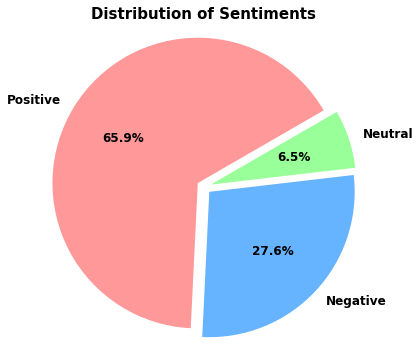

In [206]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))

labels = df2["sentiments"].value_counts().index.tolist()
sizes =  df2["sentiments"].value_counts().tolist()
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30, 
        explode = (0.05, 0.05, 0.05),textprops={'fontsize': 12, "weight":"semibold"} )

plt.title('Distribution of Sentiments', weight= "bold", fontsize = 15)
plt.axis('equal')
# Display the plot
plt.show()

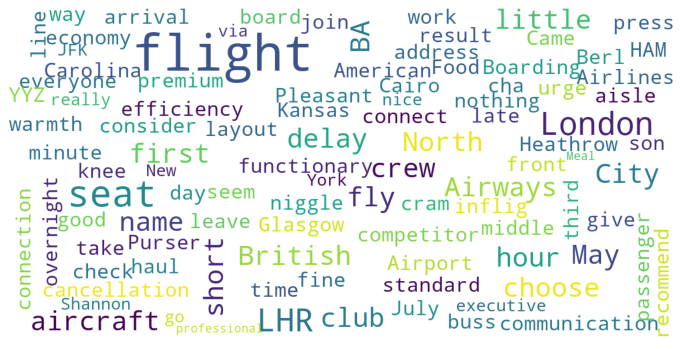

In [208]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(review_df["lemmatized_review"])

In [214]:
df2.head() ["overall_rating", "Type_Of_Traveller", "Seat_Type", "Route"]

,user_name,country_name,review_date,overall_rating,trip_verified,Type_Of_Traveller,Seat_Type,Route,Date_Flown,Food_Beverages_out_of_5,Value_For_Money_out_of_5,Seat_Comfort_out_of_5,Cabin_Staff_Service_out_of_5,Ground_Service_out_of_5,reconmmended,tagline,review_text,sentiments
0,Carlos Whilhelm,Italy,3rd July 2023,3,Not Verified,Couple Leisure,Economy Class,London Heathrow to Naples,June 2023,1,2.0,1,4,2,no,Boarding was chaotic,Airport check in was functionary with little warmth but some efficiency. Flight was delayed with...,Positive
1,S Warten,Senegal,2nd July 2023,10,✅ Trip Verified,Solo Leisure,Economy Class,Berlin to London,July 2023,3,5.0,5,5,4,yes,In-line with competitors,Flight fine. In-line with competitors. Pleasant crew. Only niggle is bussed to and from aircraft...,Positive
2,Kapil Tyagi,United States,30th June 2023,1,✅ Trip Verified,Family Leisure,Economy Class,Glasgow to London,June 2023,No information,1.0,1,1,1,no,Luggage are still in Glasgow,Came from Glasgow to London and took connecting flight American Airlines from London to North Ca...,Negative
3,Saeed Alzubaidi,United Arab Emirates,29th June 2023,1,✅ Trip Verified,Solo Leisure,Economy Class,Dubai to Keflavik via London,May 2023,No information,1.0,1,1,1,no,whole experience was terrible,My flight on on 12 May 2023 got delayed an hour and 25 minutes which resulted in the cancellatio...,Negative
4,Ralph Tuckwell,United Kingdom,29th June 2023,2,Not Verified,Couple Leisure,Economy Class,Cairo to London,June 2023,1,1.0,1,1,2,no,preferred to fly on easyJet,"Cairo is a 5 hour flight and BA considers it to be short haul, so everyone is crammed in with kn...",Negative


In [235]:
median_rating = (df2["overall_rating"][df2["overall_rating"]!="No Information"]).median()
median_rating


4.0

In [236]:
df2["overall_rating"][df2["overall_rating"]=="No Information"] = median_rating

C:\Users\HP\AppData\Local\Temp\ipykernel_5496\3864552499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["overall_rating"][df2["overall_rating"]=="No Information"] = median_rating


In [237]:
df2["overall_rating"][df2["overall_rating"]=="No Information"]

Series([], Name: overall_rating, dtype: object)

In [243]:
df2["overall_rating"] = df2["overall_rating"].apply(int)

df2["overall_rating"].mean()

4.793681856304166

In [244]:
new_df2 = df2[["overall_rating", "Type_Of_Traveller", "Seat_Type", "Route", "sentiments"]]
new_df2

,overall_rating,Type_Of_Traveller,Seat_Type,Route,sentiments
0,3,Couple Leisure,Economy Class,London Heathrow to Naples,Positive
1,10,Solo Leisure,Economy Class,Berlin to London,Positive
2,1,Family Leisure,Economy Class,Glasgow to London,Negative
3,1,Solo Leisure,Economy Class,Dubai to Keflavik via London,Negative
4,2,Couple Leisure,Economy Class,Cairo to London,Negative
...,...,...,...,...,...
3605,8,No information,Premium Economy,No information,Positive
3606,9,No information,Business Class,No information,Positive
3607,5,No information,Economy Class,No information,Positive
3608,4,No information,Premium Economy,No information,Positive


In [249]:
new_df2.groupby(by = "sentiments").agg({'overall_rating': "median"})

,overall_rating
sentiments,
Negative,2.0
Neutral,3.0
Positive,7.0


<AxesSubplot:xlabel='sentiments', ylabel='Type_Of_Traveller'>

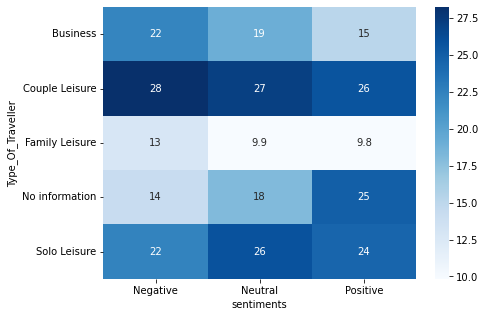

In [266]:
aa = round(pd.crosstab( df2["Seat_Type"], df2["sentiments"], normalize= 'columns')*100,2)
plt.figure(figsize=(7,5))
sns.heatmap(aa, annot= True, cmap ="Blues", )

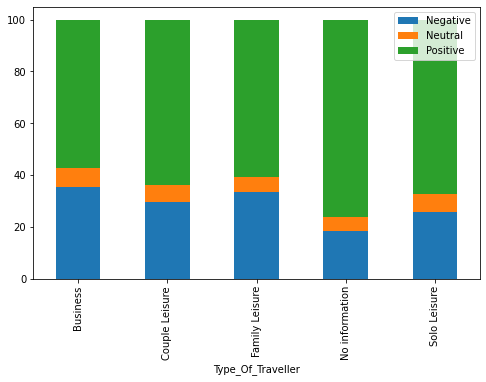

In [295]:
aa = round(pd.crosstab( df2["Type_Of_Traveller"], df2["sentiments"], normalize= 'index')*100,2)
fx = aa.plot(kind='bar', stacked=True,figsize=(8,5) )
plt.legend(loc = "upper right", )
plt.show()